# Using Decision Trees to Create a set of rules for your Targeted Segment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import os
import plotnine as plot9
import random
import io
import graphviz # conda install -c anaconda python-graphviz
import dtreeviz # conda install conda-forge::dtreeviz

In [2]:
# import algorithms or functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from plotnine import *
from sklearn import tree
from dtreeviz.trees import *
# conda install -c conda-forge dtreeviz
# https://anaconda.org/conda-forge/dtreeviz

#from sklearn.datasets import make_classification
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# from matplotlib import pyplot
# from socket import socket

In [3]:
# use svgutils to transform an image and save it
# The output from dtreeviz api will require this
import svgutils.transform as sg # conda install conda-forge::svgutils
import sys
from IPython.core.display import SVG

In [4]:
# eliminate warnings
import warnings
warnings.filterwarnings('ignore') 

In [5]:
# set up environment for graphviz
# C:\Program Files\Graphviz\bin
#os.environ["PATH"] += os.pathsep + '/Program Files/Graphviz/bin'
os.environ["PATH"] += os.pathsep + '/users/hooverjh/appdfata/roaming/python311/site-packages'

In [6]:
mydata = pd.read_csv("clu_calc.csv")
mydata

,CustID,Gender,Age,Inc,SpendScr,label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


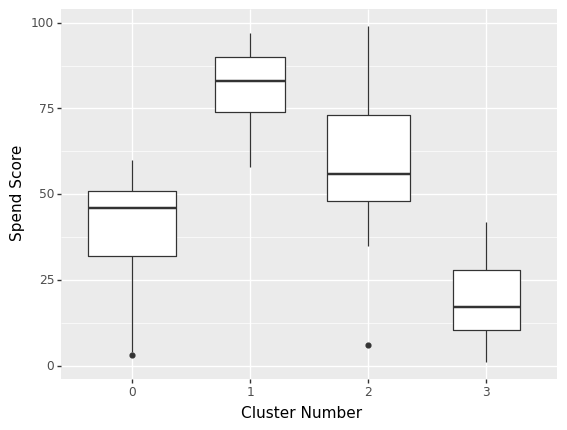

<ggplot: (336712857)>

In [7]:
# check to see what cluster to model
(
    ggplot(mydata)
    + geom_boxplot(aes(x='factor(label)', y='SpendScr'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Spend Score")

)

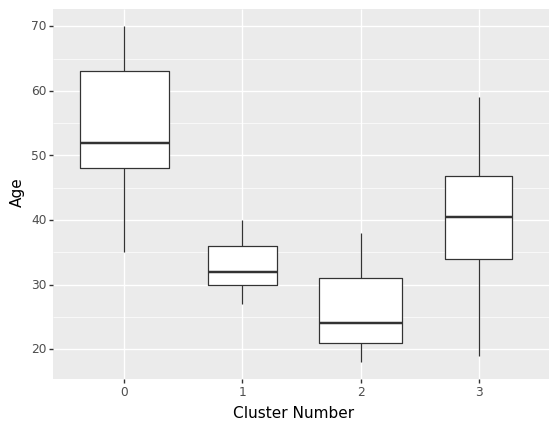

<ggplot: (337285417)>

In [8]:
(
    ggplot(mydata)
    + geom_boxplot(aes(x='factor(label)', y='Age'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Age")

)

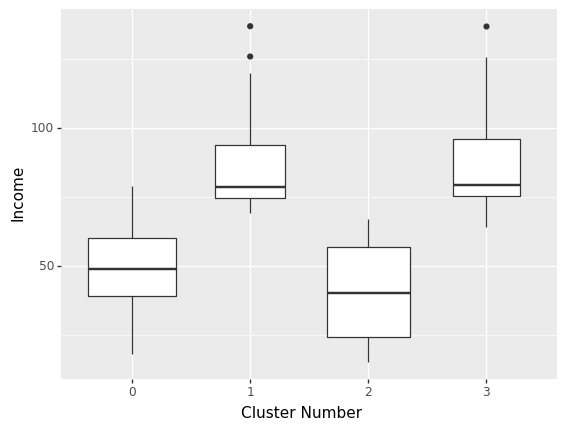

<ggplot: (336314473)>

In [9]:
(
    ggplot(mydata)
    + geom_boxplot(aes(x='factor(label)', y='Inc'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Income")

)

Cluster Number 2 is the cluster of interest from the unsupervised learning. Next we will create a new feature (variable) in the dataframe representing the cluster of interest, or one of the other clusters.

In [10]:
# label cluster 0 as the target of interest in a new column called 'target'
mydata['target'] = np.where(mydata['label']==2, 1, 0)
mydata

,CustID,Gender,Age,Inc,SpendScr,label,target
0,1,Male,19,15,39,2,1
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,1
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,3,0
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,3,0


Decision Tree

In [11]:
# features are your predictor or X variables
# using the Age and Income variables as the features to predict whether 
# a customer is in the targeted segment
features = ['Age', 'Inc']
X = mydata[features]
y = mydata.target

Trying the Decision Tree without a split (into train and test) because there are only 200 observations.

In [12]:
# create an object for the decision tree model
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dtm = DecisionTreeClassifier()

In [13]:
# fit the decision tree model using the target and dependent variables
dtm = dtm.fit(X, y)

In [14]:
# predict whether each observation is in the target segment
y_predict = dtm.predict(X)

In [15]:
# Look at the predictions. This will yield an array of the predictions 1 / 0. 1 will be the target.
y_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [16]:
# add the prediction array to the mydata dataframe
mydata['predictions'] = y_predict
mydata

,CustID,Gender,Age,Inc,SpendScr,label,target,predictions
0,1,Male,19,15,39,2,1,1
1,2,Male,21,15,81,2,1,1
2,3,Female,20,16,6,2,1,1
3,4,Female,23,16,77,2,1,1
4,5,Female,31,17,40,2,1,1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0,0
196,197,Female,45,126,28,3,0,0
197,198,Male,32,126,74,1,0,0
198,199,Male,32,137,18,3,0,0


In [17]:
# calculate the model's effectiveness
dtm.score(X,y)*100

# this means that it got 2 wrong
# this is like the gini score

100.0

In [18]:
y_pred = mydata['predictions']
y_true = mydata['target']
metrics.accuracy_score(y_true, y_pred)
model_acc = metrics.accuracy_score(y_true, y_pred)*100
print("The decision tree model accuracy is",model_acc,"%")

The decision tree model accuracy is 100.0 %


In [19]:
# precision metric
print("Precision Score =  ", metrics.precision_score(y_true, y_pred))

Precision Score =   1.0


In [20]:
# recall metric
print("Recall Score =  ", metrics.recall_score(y_true, y_pred))

Recall Score =   1.0


In [21]:
# This illustrates the values preserved in the model for the decision tree output
tree.plot_tree(dtm)

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= 27.5\ngini = 0.408\nsamples = 200\nvalue = [143, 57]'),
 Text(0.18181818181818182, 0.75, 'x[1] <= 68.5\ngini = 0.287\nsamples = 46\nvalue = [8, 38]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.2727272727272727, 0.5833333333333334, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 35.5\ngini = 0.216\nsamples = 154\nvalue = [135, 19]'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[1] <= 65.0\ngini = 0.453\nsamples = 52\nvalue = [34, 18]'),
 Text(0.36363636363636365, 0.4166666666666667, 'x[1] <= 18.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.2727272727272727, 0.25, 'x[0] <= 33.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.454545454545454

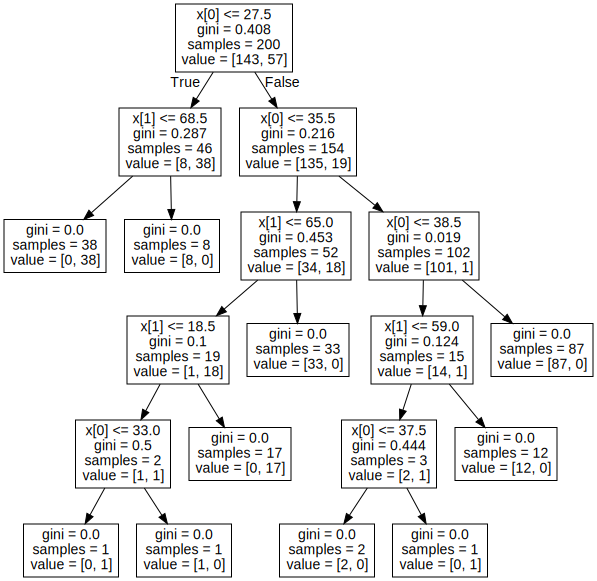

In [22]:
# using graphviz
dot_data = tree.export_graphviz(dtm, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [23]:
# create a list vector of feature names
feature_names = mydata[features].columns
feature_names

Index(['Age', 'Inc'], dtype='object')

In [24]:
# add a new column that can be used to identify the target segment
mydata['target_name'] = np.where(mydata['label']==2, "Target Segment", "Other Segment")
mydata

,CustID,Gender,Age,Inc,SpendScr,label,target,predictions,target_name
0,1,Male,19,15,39,2,1,1,Target Segment
1,2,Male,21,15,81,2,1,1,Target Segment
2,3,Female,20,16,6,2,1,1,Target Segment
3,4,Female,23,16,77,2,1,1,Target Segment
4,5,Female,31,17,40,2,1,1,Target Segment
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0,0,Other Segment
196,197,Female,45,126,28,3,0,0,Other Segment
197,198,Male,32,126,74,1,0,0,Other Segment
198,199,Male,32,137,18,3,0,0,Other Segment


In [25]:
# The end of the code block sends the decision tree graphic to a .pdf file.
dot_data = tree.export_graphviz(dtm, out_file=None,
                               leaves_parallel = True,
                               feature_names=feature_names,
                               class_names= ("Other Segments", "Target Segment"),
                               filled=True, rounded=True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph
graph.render("MallC")

'MallC.pdf'

In [26]:
model_acc = dtm.score(X,y)*100
print("The accuracy of the current decision tree model is", model_acc, "%")

The accuracy of the current decision tree model is 100.0 %


In [27]:
misclass = len(y)-(model_acc/100*len(y))
print(misclass, "observations were misclassified by the model")

0.0 observations were misclassified by the model


In [28]:
# fit the decision tree model using the target and dependent variables with max splits = 2
# 2 splits reduces the probability of over fitting the model
dtm = DecisionTreeClassifier(max_depth=3)
dtm = dtm.fit(X, y)
y_predict = dtm.predict(X)
mydata['predictions'] = y_predict
mydata['target_name'] = np.where(mydata['label']==2, "Target Segment", "Other Segment")
mydata

,CustID,Gender,Age,Inc,SpendScr,label,target,predictions,target_name
0,1,Male,19,15,39,2,1,1,Target Segment
1,2,Male,21,15,81,2,1,1,Target Segment
2,3,Female,20,16,6,2,1,1,Target Segment
3,4,Female,23,16,77,2,1,1,Target Segment
4,5,Female,31,17,40,2,1,1,Target Segment
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0,0,Other Segment
196,197,Female,45,126,28,3,0,0,Other Segment
197,198,Male,32,126,74,1,0,0,Other Segment
198,199,Male,32,137,18,3,0,0,Other Segment


In [29]:
model_acc = dtm.score(X,y)*100
print("The accuracy of the new limited decision tree model is", model_acc,"%")

The accuracy of the new limited decision tree model is 99.0 %


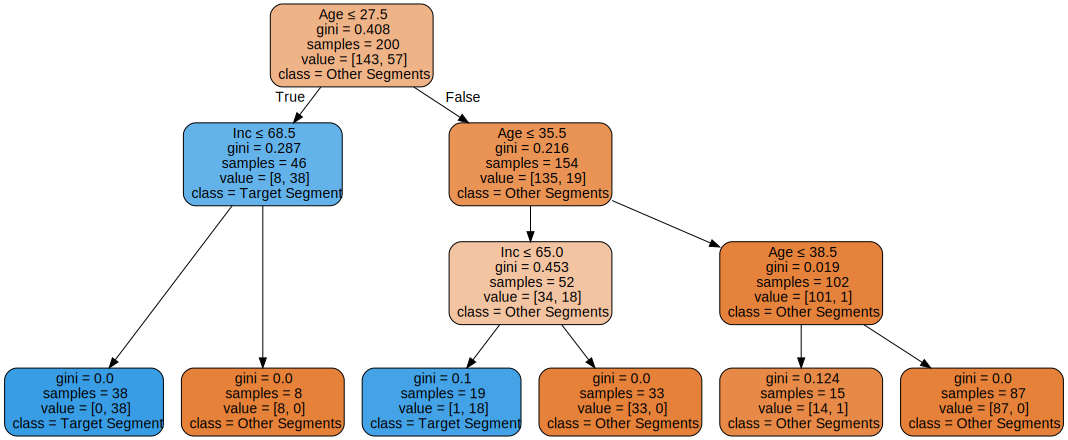

In [30]:
dot_data = tree.export_graphviz(dtm, out_file=None,
                               leaves_parallel = True,
                               feature_names=feature_names,
                               class_names= ("Other Segments", "Target Segment"),
                               filled=True, rounded=True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph
# graph.render("MallC")

Income must be more than $68K and the customer's age must be between 26-40 years old. That is a simple rule that could be implemented purely by training (instead of implementation in your CRM system). 

In [31]:
model_acc = dtm.score(X,y)*100
misclass = len(y)-(model_acc/100*len(y))
print(misclass, "observations were misclassified by the model")

2.0 observations were misclassified by the model


The predictions are created using probabilities that each observation is in the target class. Then each probability is compared with the cutoff threshold score. In most machine learning models, that cutoff threshold value is set to 0.5.

In [32]:
print(dtm)

DecisionTreeClassifier(max_depth=3)


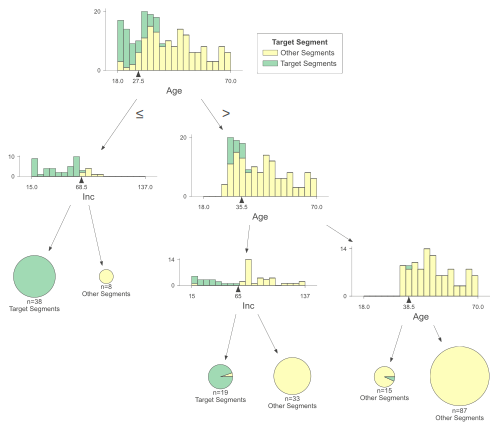

In [33]:
viz = dtreeviz.model(dtm, X, y,
              #x_data = X.values,
              #y_data = y.values,
              target_name = "Target Segment",
              feature_names = feature_names,
              
              # class_names = list(mydata.target),
              class_names = ('Other Segments', 'Target Segments'),
              #scale=2.0 # changes the size of the plot
              )
viz.view()

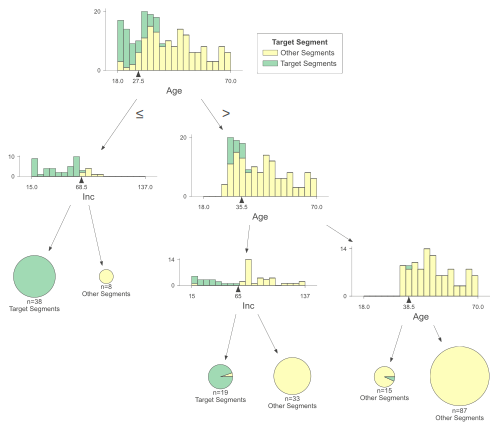

In [34]:
# send the image to svg
graphviz_output = viz.view()
graphviz_output.save("mallc.svg")
graphviz_output

In [35]:
# this code will tranform the size of the output from graphviz output to make it larger
fig = sg.fromfile('mallc.svg')
fig.set_size(('600','600'))
fig.save('mallc2.svg')

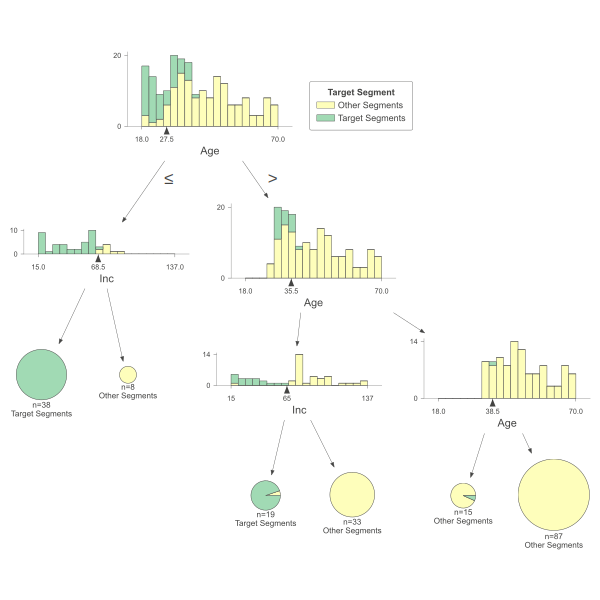

In [36]:
# this code will display the resized svg file
SVG(filename='mallc2.svg')

In [37]:
# probabilities produced by the decision tree model
y_prob = dtm.predict_proba(X)
y_prob[0:199]


mydata["Probability"] = y_prob[:, [1]]
mydata


,CustID,Gender,Age,Inc,SpendScr,label,target,predictions,target_name,Probability
0,1,Male,19,15,39,2,1,1,Target Segment,1.000000
1,2,Male,21,15,81,2,1,1,Target Segment,1.000000
2,3,Female,20,16,6,2,1,1,Target Segment,1.000000
3,4,Female,23,16,77,2,1,1,Target Segment,1.000000
4,5,Female,31,17,40,2,1,1,Target Segment,0.947368
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0,0,Other Segment,0.000000
196,197,Female,45,126,28,3,0,0,Other Segment,0.000000
197,198,Male,32,126,74,1,0,0,Other Segment,0.000000
198,199,Male,32,137,18,3,0,0,Other Segment,0.000000


In [38]:
y_pred = mydata["predictions"]
# Actual values
# Importing the dependencies

y_act = mydata["target"]

y_act
y_pred
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=[0, 1]))

[[142   1]
 [  1  56]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.98      0.98      0.98        57

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [39]:
# more metrics for model assessment
fpr, tpr, thresholds = roc_curve(y_act, y_pred)

In [40]:
ns_probs = [0 for _ in range(len(mydata.Probability))]
ns_fpr, ns_tpr, _ = roc_curve(mydata["target"], ns_probs)

Decision Tree: ROC AUC=0.998
No Skill: ROC AUC=0.500


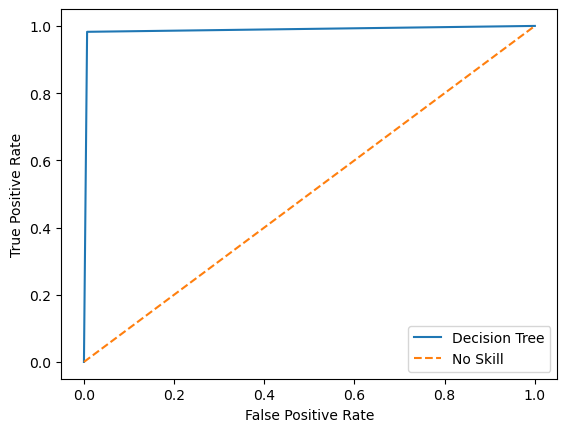

In [41]:
# calculate scores
auc = roc_auc_score(mydata["target"], mydata["Probability"])
ns_auc = roc_auc_score(mydata["target"], ns_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# clear the existing plot from memory
plt. clf()

# calculate roc curves
plt.plot(fpr, tpr, linestyle='-', label='Decision Tree')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()